In [1]:
import os
import argparse
from pathlib import Path
from time import strftime
from shutil import rmtree

In [2]:
from rtapipe.lib.dataset.dataset import APDataset

In [3]:
outDirBase = Path("./").parent.resolve().joinpath(f"lstm_models_{strftime('%Y%m%d-%H%M%S')}")
outDirBase.mkdir(parents=True, exist_ok=True)

In [4]:
dataset_config = ! pwd
dataset_config = dataset_config.pop()
dataset_config = Path(dataset_config).joinpath("../lib/dataset/config/agilehost3-prod5.yml")
dataset_config

PosixPath('/data01/homes/baroncelli/phd/rtapipe/notebooks/../lib/dataset/config/agilehost3-prod5.yml')

In [5]:
dataset_id = 601

In [6]:
ds = APDataset.get_dataset(dataset_config, dataset_id, scaler_type="mm", outDir=outDirBase)

In [7]:
ds.loadData()

Loading dataset from /scratch/baroncelli/AP_DATA_PROD5/ap_data_bkg_T_10_TSL_10/backgrounds_prod5b_1K/integration_te_integration_time_10_region_radius_0.2_timeseries_lenght_10


1000it [00:02, 405.91it/s]

Single csv file shape: (10, 10)
Dataframe shape: (10000, 10). Columns: ['TMIN' 'TMAX' 'COUNTS_0.03-0.0857' 'ERROR_0.03-0.0857'
 'COUNTS_0.0857-0.2449' 'ERROR_0.0857-0.2449' 'COUNTS_0.2449-0.6999'
 'ERROR_0.2449-0.6999' 'COUNTS_0.6999-2.0' 'ERROR_0.6999-2.0']
Dropped columns=['ERROR_0.0857-0.2449', 'ERROR_0.2449-0.6999', 'TMAX', 'ERROR_0.6999-2.0', 'TMIN', 'ERROR_0.03-0.0857'] from dataset
Dataframe shape: (10000, 4). Columns: ['COUNTS_0.03-0.0857' 'COUNTS_0.0857-0.2449' 'COUNTS_0.2449-0.6999'
 'COUNTS_0.6999-2.0']


In [8]:
train_x, train_y, val_x, val_y = ds.train_val_split()

train_val_split called
Training set: (700, 10, 4) Labels: (700,)
Validation set: (300, 10, 4) Labels: (300,)
Normalize data..


In [9]:
train_x.shape

(700, 10, 4)

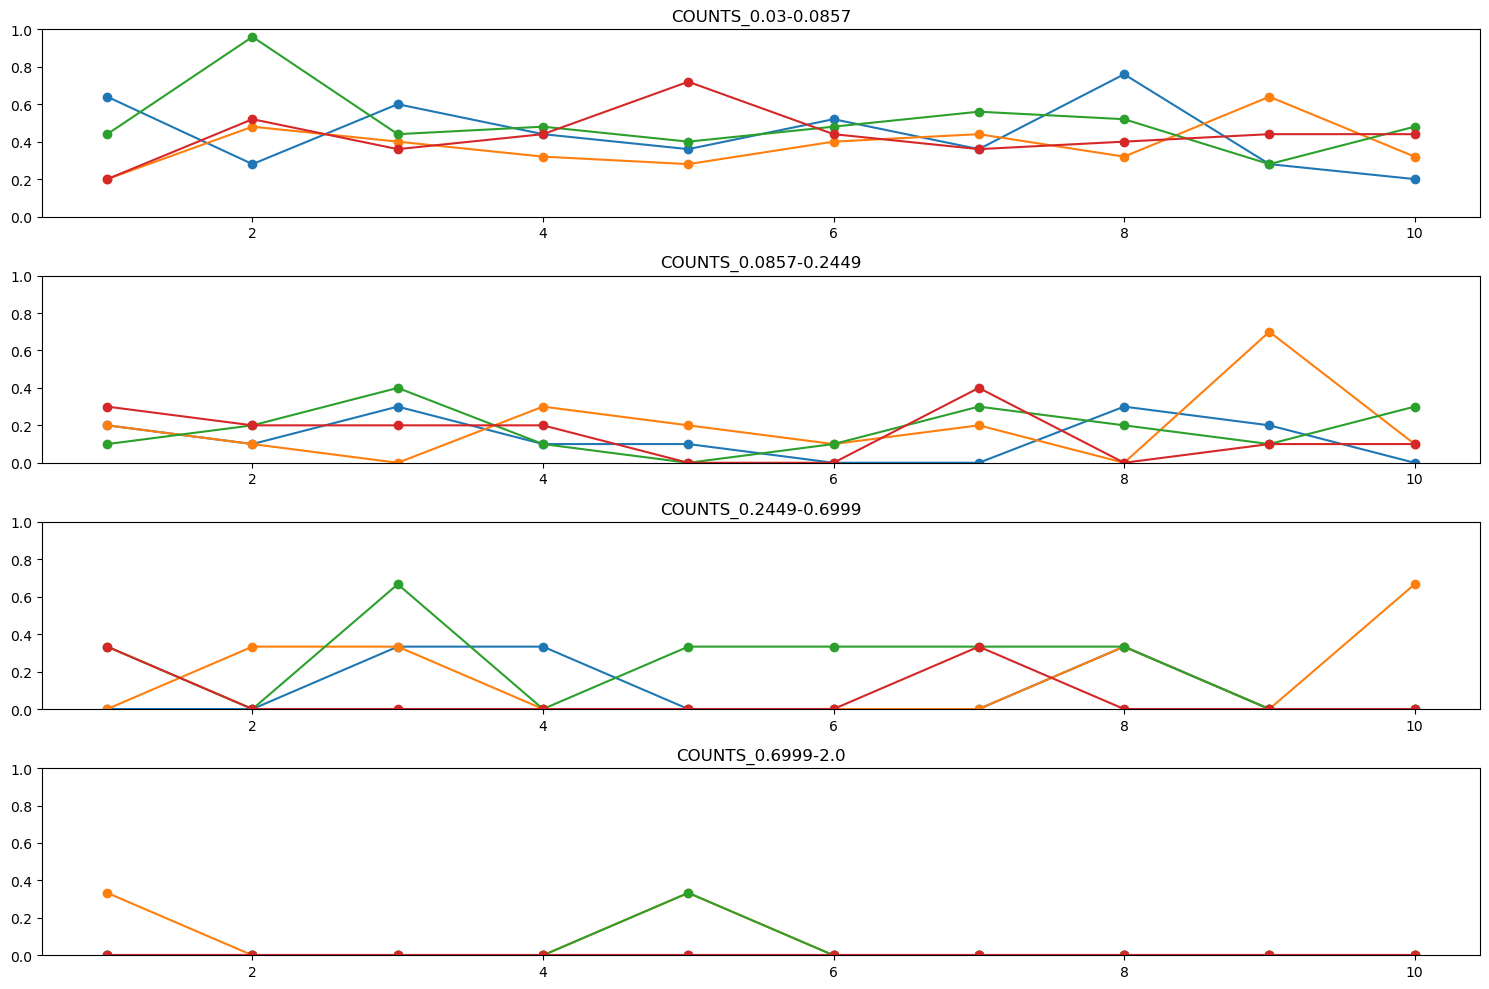

In [10]:
ds.plotRandomSample(howMany=4, showFig=True)
